train_set.csv.zip	训练集数据（选手需要自行解压）	236.11MB(20w条)	https://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531810/train_set.csv.zip<br>
test_a.csv.zip	测试集A榜数据（选手需要自行解压）	59.12MB(5w条)	https://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531810/test_a.csv.zip<br>
test_a_sample_submit.csv	测试集A榜提交样例	97.66KB(5w条)	https://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531810/test_a_sample_submit.csv<br>
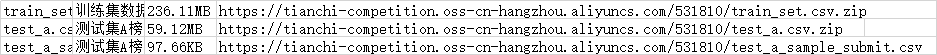

In [1]:
!mkdir data
!wget https://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531810/train_set.csv.zip
!unzip train_set.csv.zip -d data # 那么现在 zipped_file.zip 中所有的内容都会被提取到 unzipped_directory 中。
%rm train_set.csv.zip

--2021-03-20 16:13:54--  https://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531810/train_set.csv.zip
Resolving tianchi-competition.oss-cn-hangzhou.aliyuncs.com (tianchi-competition.oss-cn-hangzhou.aliyuncs.com)... 118.31.232.194
Connecting to tianchi-competition.oss-cn-hangzhou.aliyuncs.com (tianchi-competition.oss-cn-hangzhou.aliyuncs.com)|118.31.232.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247578940 (236M) [application/zip]
Saving to: ‘train_set.csv.zip’

100%[======================================>] 247,578,940 11.7MB/s   in 19s    

2021-03-20 16:14:14 (12.5 MB/s) - ‘train_set.csv.zip’ saved [247578940/247578940]

Archive:  train_set.csv.zip
  inflating: data/train_set.csv      


In [2]:
import pandas as pd
train_data = pd.read_csv('./data/train_set.csv', sep='\t')

In [3]:
len(train_data)

200000

In [4]:
train_data.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


分析句子长度、分布等信息

In [5]:
train_data['text_len'] = train_data['text'].apply(lambda x: len(x.split(' ')))
train_data['text_len'].describe()

count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Histogram of character count')

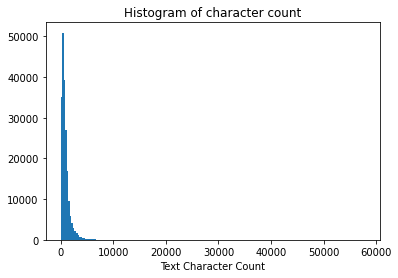

In [5]:
%pylab inline
plt.hist(train_data['text_len'], bins=200) # bins如果是整数，那就是桶的数目
plt.xlabel('Text Character Count')
plt.title('Histogram of character count')

分析标签的分布<br>
{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}

Text(0.5, 1.0, 'News class count')

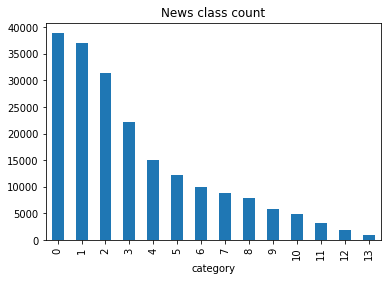

In [6]:
train_data['label'].value_counts().plot(kind='bar')
plt.xlabel('category')
plt.title('News class count')

字符分布统计

In [4]:
# 可能是数据太大了，天池的DSW老是断开连接
from collections import Counter

train_df = train_data[0:50000] # 先拿50000条试试
all_lines = ' '.join(list(train_df['text'])) 
word_counts = Counter(all_lines.split(' '))
word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
print(len(word_counts))
print(word_counts[0])
print(word_counts[1])

6180
('3750', 1863795)
('648', 1225648)


这里可以根据字在每个句子出现的情况，反推出标点符号。3750与900等覆盖率接近99%，很有可能是标题符号

In [7]:
train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' '))))) # 每个句子变成set集和

all_lines = ' '.join(list(train_df['text_unique'])) # 先拿50000条试试
word_counts = Counter(all_lines.split(' '))
word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
print(len(word_counts))
print(word_counts[0])
print(word_counts[1])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


6180
('3750', 49504)
('900', 49433)


In [77]:
train_gb = train_data.groupby('label')
for label,gb in train_gb:
    print(str(label) + ":平均每句长度:", gb['text_len'].mean())
    train_gb['text_unique'] = train_gb['text'].apply(lambda x: " ".join(set(x.str.split(' '))))
    all_lines = ' '.join(list(train_gb['text_unique']))
    word_count = Counter(all_lines.split(' '))
    word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
    print(list(word_count[0:7]))

0:平均每句长度: 878.7176627781489


TypeError: unhashable type: 'list'

# 数据分析的结论

In [16]:
train_data['label'].value_counts()[13] # 星座类新闻个数

908

1. 平均每句907个字符
2. 新闻类别分布不均匀，科技类近4万，星座类不到1000
3. 一共包含7000到8000字符
4. 平均长度太大，可能需要截断

# 文本表示方法

## Count Vectors + RidgeClassifier
Bag of Words, 也称Count Vectors, 每个文档的字/词可以使用其出现的次数来表示

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
 'This is the first document.',
 'This document is the second document.',
 'And this is the third one.',
 'Is this the first document?',
]
vectorizer = CountVectorizer()
vectorizer.fit_transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [56]:
vectorizer = CountVectorizer(max_features=5) # 只保留5个数量最高的特征
vectorizer.fit_transform(corpus).toarray()

array([[1, 1, 1, 1, 1],
       [2, 0, 1, 1, 1],
       [0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=int64)

In [62]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score

In [65]:
train_df = train_data[:15000]
vectorizer = CountVectorizer(max_features=3000) # 只保留3000个数量最高的特征
train_test = vectorizer.fit_transform(train_df['text'])

clf = RidgeClassifier()
clf.fit(train_test[:10000], train_df['label'].values[:10000])

pre = clf.predict(train_test[10000:])
print(f1_score(train_df['label'].values[10000:], pre,  average='macro'))

0.7415473305232997


## TF-IDF + RidgeClassifier

TF-IDF分数有两部分相乘，第一部分：<b>词语频率</b>，第二部分<b>逆文档频率</b><br>
TF(t) = 该词语在当前文档出现的次数 / 当前文档中词语的总数<br>
IDF(t) = log_e(文档总数 / 出现该词语的文档总数)

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [72]:
tfidf = TfidfVectorizer()
corpus = [
 'This is the first document.',
 'This document is the second document.',
 'And this is the third one.',
 'Is this the first document?',
]
tfidf.fit_transform(corpus).toarray()

array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524],
       [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
        0.        , 0.26710379, 0.51184851, 0.26710379],
       [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])

In [74]:
tfidf = TfidfVectorizer(max_features=3000)
train_test = tfidf.fit_transform(train_df['text'])

clf = RidgeClassifier()
clf.fit(train_test[:10000], train_df['label'][:10000])
pre = clf.predict(train_test[10000:])
print(f1_score(train_df['label'][10000:], pre, average='macro'))

0.8588110190969614


In [75]:
print(f1_score(train_df['label'][10000:], pre, average='micro')) # average='micro'考虑了数据类别不平衡的问题

0.8932


## 基于FastText的文本分类
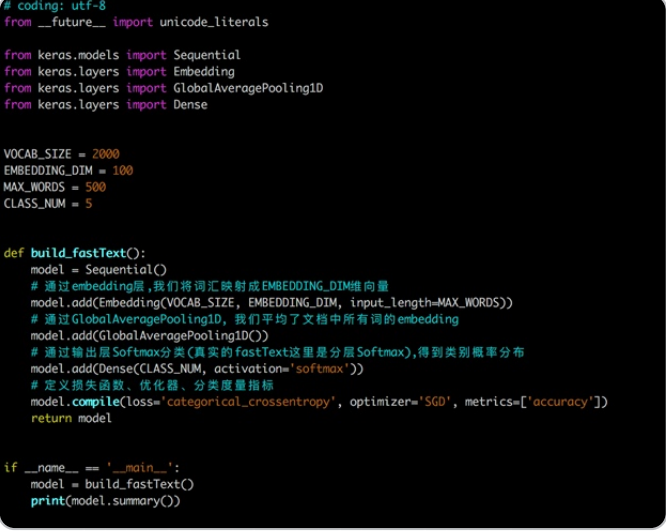

In [76]:
pip install fasttext

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.aliyun.com/pypi/simple
Note: you may need to restart the kernel to use updated packages.


In [79]:
# 转换为FastText需要的格式
train_df['label_fit'] = '__label__' + train_df['label'].astype(str)
train_df[['text', 'label_fit']].iloc[:-5000].to_csv('./data/fasttext_train.csv', sep=' ', header=None, index=None)

import fasttext
model = fasttext.train_supervised('./data/fasttext_train.csv', lr=1.0, wordNgrams=2, verbose=2, minCount=2, epoch=25, loss='hs')

val_pred = [model.predict(x)[0][0].split('__')[-1] for x in train_df.iloc[-5000:]['text']]
print(f1_score(train_df['label'].values[-5000:].astype(str), val_pred, average='macro'))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.8207095792434476


## Word2Vec
word2vec的主要思路：通过单词或上下文预测彼此，对应的两个算法分别为：<br>
- 1. Skip-grams(SG): 预测上下文
- 2. Continuous Bag Of Words(CBOW): 预测目标单词


另外提出两种更加高效的训练方法：
- 1. Hierarchical softmax
- 2. Negative sampling


In [2]:
import pandas as pd
train_data = pd.read_csv('./data/train_set.csv', sep='\t')

In [8]:
# 使用fensim训练word2vec
from gensim.models.word2vec import Word2Vec
sentences = list(train_data['text'][:10000].apply(lambda x: x.split(' ')))
model = Word2Vec(sentences, workers=2, size=300, min_count=2)

# model['2967']: 查看词2967的embedding

In [15]:
model.save('./data/word2vec_embedding')